In [261]:
import pandas as pd
import numpy as np
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import OrderedDict
from matplotlib.patches import Rectangle

np.random.seed(12345)

data = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

In [262]:
# color we use 
max_color     ='red'
min_color     ='blue'
neitral_color ='grey'
# color for map
iter_col      = OrderedDict( [('navy','-100%'),     
                           ('blue','-80%'),
                           ('steelblue','-60%'),
                           ('lightblue','-40%'), 
                           ('lightcyan','-20%'),
                           ('wheat','20%'),
                           ('sandybrown','40%'),
                           ('salmon','60%'),
                           ('red','80%'),
                           ('brown','100%')]) 

In [263]:
def data_prepare (data):
    data['mean']=data.mean(axis=1)
    data['std']=data.std(axis=1)
    data['sem']=data.sem(axis=1)
    # set intervals
    data['interval_min']=data['mean']-data['sem']*4
    data['interval_max']=data['mean']+data['sem']*4
    # error bar
    data['yerr']=data['sem']*4 
    return data

In [264]:
def main_bar_plot (x, y, fig_title, data):
    data = data_prepare(data)
    ax=data['mean'].plot.bar(yerr=data['yerr'], 
    title =fig_title,
    figsize=(x, y),
    legend=False,
    fontsize=10,
    alpha=0.5,
    width=0.95, 
    position=0,
    style='-',
    color=neitral_color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.xaxis.set_ticks([0.5,1.5,2.5, 3.5])
    plt.show()
    bars_map=[]
    for k, v in iter_col.items():
        p=Rectangle((0, 0), 1, 1, fc=k, label=v)
        bars_map.append(p)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.04), 
           handles=bars_map, ncol=len(bars_leg), columnspacing=0.2, handletextpad=0.1, fontsize=7)
    return (ax, ax.get_children()[1:5])

In [267]:
# create a class Inter (interactivity) 
class Inter(object):
    _df       = None
    _bl       = None
    _colors=list(reversed(iter_col.keys()))
    _num_bins=8
    
    def __init__(self, ax, data_F, bars):
        self._df = data_F
        self._bl = bars
        self.ax  = ax
        self.lx  = ax.axhline(color='b') 
        self.horizontal_line = None
        self.line_label = None

    def _get_color(self, d_series, val):
        s=d_series[['interval_min', 'interval_max']]
        s['val']=val
        s=pd.cut(s, bins=self._num_bins, labels=list(range(self._num_bins)), include_lowest=False, right=True)
        return self._colors[s['val']+1]
    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['interval_max']<y:
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[-1])
                continue
            if row['interval_min']>y:
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[0])
                continue
            
            self._bl[self._df.index.get_loc(index)].set_color(self._get_color(row, y))
        plt.draw()

<IPython.core.display.Javascript object>


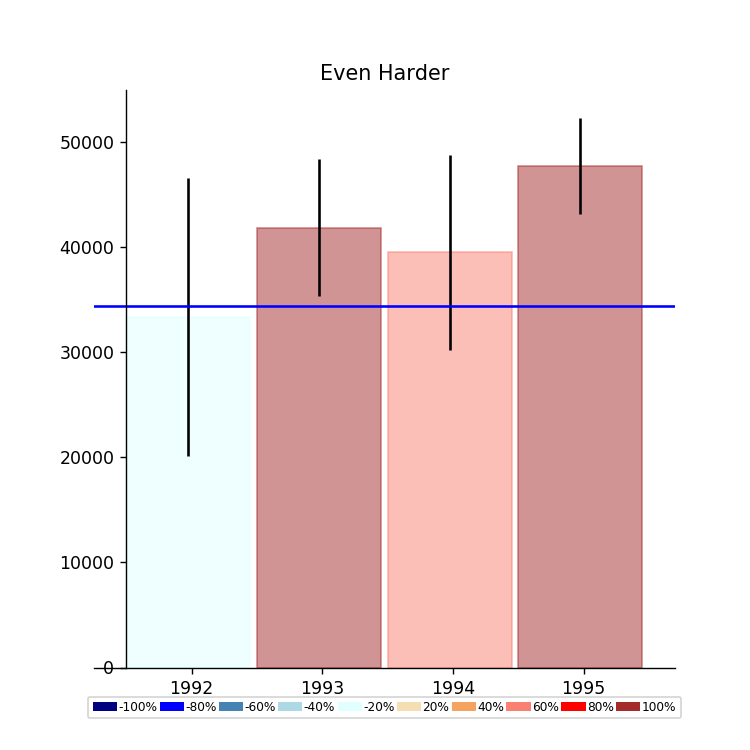

7

In [269]:
ax, barlist=main_bar_plot(6, 6, 'Even Harder', data)
mouse_movement = Inter(ax, data, barlist)
plt.connect('motion_notify_event', mouse_movement.mouse_move)